In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pricing_functions import data_treatment, request, product_pricing
from ys_functions import *

In [2]:
product_database = {}
weeks = 36
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = request()
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

#### Dataframe - Quantity of products

In [3]:
all_qnt= df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_qnt.head(10)

,date,week,month,id,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
0,2021-06-02,Week 1,June,lavhy4vlga6bcayvy6,29.0,45.0,30.0,40.0,243.527210,793.730269,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1103.563358
1,2021-06-03,Week 1,June,lavhy4vlce88kq9pxee,8.0,5.0,12.0,635.0,0.000000,931.380349,2.0,11.0,3.0,0.0,0.000000,0.000000,0.0,1103.563358
2,2021-06-03,Week 1,June,lavhy4vl1l19aja09ozh,25.0,0.0,0.0,786.0,437.890391,666.283895,43.0,46.0,0.0,23.0,422.721848,0.000000,0.0,1103.563358
3,2021-06-03,Week 1,June,lavhy4vlpzy276txx8,0.0,0.0,0.0,0.0,697.970330,861.010706,0.0,0.0,49.0,22.0,774.939619,197.562978,0.0,1103.563358
4,2021-06-03,Week 1,June,lavhy4vlbpb9aoyu6wo,0.0,0.0,37.0,0.0,0.000000,869.892350,0.0,0.0,39.0,0.0,0.000000,0.000000,0.0,1103.563358
5,2021-06-02,Week 1,June,lavhy4vlwky64pdp0v,0.0,26.0,0.0,48.0,46.132728,1052.918563,0.0,0.0,0.0,0.0,0.000000,380.590125,5.0,1103.563358
6,2021-06-03,Week 1,June,lavhy4vl80ksfg7f8eh,0.0,10.0,42.0,498.0,81.931370,605.366647,0.0,42.0,0.0,31.0,83.722335,253.262744,0.0,1103.563358
7,2021-06-03,Week 1,June,lavhy4vlezl2uw64ya5,10.0,0.0,0.0,232.0,0.000000,1305.626123,25.0,40.0,0.0,11.0,0.000000,0.000000,17.0,1103.563358
8,2021-06-02,Week 1,June,lavhy4vlfwr9cfvhi2e,0.0,0.0,0.0,613.0,1.762410,864.633657,0.0,0.0,12.0,45.0,0.000000,0.000000,38.0,1103.563358
9,2021-06-03,Week 1,June,lavhy4vl8wua4zgw2u,0.0,50.0,35.0,166.0,44.430811,1109.332088,0.0,0.0,35.0,39.0,0.000000,726.858091,0.0,1103.563358


In [4]:
sum_all_prods = {f'{x}':'sum' for x in all_qnt.columns[4:]}

#### Grouping - Quantity - Week

In [5]:
weekly_qnt= all_qnt.groupby('week', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
week,,,,,,,,,,,,,,
Week 1,316.0,370.0,248.0,7935.0,5827.915938,25374.783406,219.0,364.0,265.0,503.0,4423.676556,6224.525354,213.0,27589.083961
Week 2,103.0,176.0,242.0,4514.0,6011.066489,30357.508411,153.0,283.0,189.0,438.0,5761.286559,5719.496971,393.0,26485.520603
Week 3,101.0,224.0,334.0,1735.0,3113.158607,23866.612669,244.0,257.0,385.0,223.0,2376.122237,4477.384994,87.0,18760.577094
Week 4,451.0,482.0,398.0,6350.0,9985.227885,51609.309326,463.0,614.0,538.0,392.0,9564.560176,10035.548600,335.0,39728.280904
Week 5,76.0,143.0,150.0,1265.0,2588.192118,16531.959816,159.0,146.0,170.0,244.0,3524.248472,2867.791725,183.0,15449.887018


#### Grouping - Quantity - Month

In [6]:
monthly_qnt= all_qnt.groupby('month', sort=False).agg(sum_all_prods)
monthly_qnt.head()

,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
month,,,,,,,,,,,,,,
June,1140.0,1179.0,1237.0,24292.0,24263.493607,153428.175482,1083.0,1473.0,1296.0,1566.0,19399.910987,26167.109803,1413.0,122495.532788
July,907.0,997.0,1264.0,15270.0,22851.964566,117244.584658,1249.0,1282.0,1359.0,1196.0,22897.672397,22919.776385,855.0,101527.828977
August,1061.0,904.0,808.0,13167.0,15192.907490,60733.181483,662.0,606.0,1263.0,1179.0,15788.225905,14628.670798,809.0,82767.251884
September,405.0,577.0,591.0,7791.0,7373.229332,27784.705027,421.0,423.0,533.0,384.0,6588.803270,11999.329384,431.0,47453.224413
October,723.0,722.0,594.0,9868.0,13574.548229,37912.783223,769.0,932.0,624.0,659.0,14694.997810,9773.607609,434.0,58488.857998


In [7]:
monthly_qnt.to_csv('monthly_revenue.csv')

#### DataFrame - Product Price

In [8]:
all_prices= df_to_analysis(all_jsons=all_jsons, column_name='price')
all_prices.head()

,date,week,month,id,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
0,2021-06-02,Week 1,June,lavhy4vlga6bcayvy6,39.54,82.82,27.6,86.48,16.15,17.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,3.964808e+08
1,2021-06-03,Week 1,June,lavhy4vlce88kq9pxee,39.54,82.82,27.6,86.48,0.00,17.0,4.92,50.16,19.95,0.00,0.0,0.00,0.0,3.964808e+08
2,2021-06-03,Week 1,June,lavhy4vl1l19aja09ozh,39.54,0.00,0.0,86.48,16.15,17.0,4.92,50.16,0.00,82.04,55.5,0.00,0.0,3.964808e+08
3,2021-06-03,Week 1,June,lavhy4vlpzy276txx8,0.00,0.00,0.0,0.00,16.15,17.0,0.00,0.00,19.95,82.04,55.5,67.46,0.0,3.964808e+08
4,2021-06-03,Week 1,June,lavhy4vlbpb9aoyu6wo,0.00,0.00,27.6,0.00,0.00,17.0,0.00,0.00,19.95,0.00,0.0,0.00,0.0,3.964808e+08


In [9]:
all_prices.to_csv('all_prices.csv')

#### Grouping - Price - Week

In [10]:
weekly_price= all_prices.groupby('week', sort=False).agg(sum_all_prods)
weekly_price.head()

,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
week,,,,,,,,,,,,,,
Week 1,514.020000,1325.120000,358.800000,1989.04,306.85000,425.00,34.440000,652.080000,239.400000,1394.680000,666.000,809.520,716.100000,9.912019e+09
Week 2,355.860000,828.200000,303.600000,1556.64,323.00000,408.00,44.280000,652.080000,219.450000,1148.560000,610.500,809.520,1074.150000,9.515539e+09
Week 3,355.853094,1118.069954,414.000000,1816.08,314.92500,433.50,73.799994,752.400000,359.099978,1353.660000,582.750,1011.900,751.905000,6.740173e+09
Week 4,1690.302048,2795.174885,1179.899999,5448.24,944.77500,1377.00,243.539982,2482.919998,1032.412435,3322.619991,2872.125,3642.840,2416.819970,1.427331e+10
Week 5,533.779594,1397.587442,652.049999,2334.96,490.55625,803.25,99.629992,1015.739999,471.318720,2768.849990,1498.500,1366.065,1933.455975,5.550731e+09


#### Grouping - Price - Month

In [11]:
monthly_price=all_prices.groupby('month').agg(sum_all_prods)
monthly_price.head()

,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
month,,,,,,,,,,,,,,
April,3.747125e+06,7.229142e+06,3.165542e+06,1.272489e+07,2.497185e+06,3.306968e+06,3.067546e+05,4.128123e+06,2.288691e+06,8.184066e+06,4.844483e+06,6.561413e+06,2.197201e+06,1.229090e+10
August,2.426191e+08,4.287807e+08,1.137603e+08,6.384440e+08,1.068418e+08,1.629924e+08,2.264248e+07,1.827484e+08,1.205039e+08,4.483491e+08,2.979883e+08,3.169279e+08,1.008979e+08,2.973606e+10
December,2.154629e+05,4.056433e+05,1.790065e+05,8.415347e+05,1.644892e+05,2.172602e+05,2.824705e+04,3.302832e+05,1.345988e+05,5.827779e+05,3.780484e+05,3.479193e+05,1.444734e+05,2.815013e+10
February,8.959986e+05,1.509577e+06,5.709190e+05,2.215340e+06,4.216672e+05,6.113546e+05,9.452587e+04,9.142785e+05,4.029472e+05,1.293285e+06,9.842760e+05,1.129917e+06,4.099034e+05,1.149794e+10
January,4.761345e+05,1.196782e+06,2.356173e+05,1.287548e+06,2.687355e+05,3.759319e+05,6.786473e+04,4.063460e+05,2.227675e+05,7.364543e+05,7.047902e+05,7.975887e+05,2.732690e+05,1.546275e+10


#### Consolidate (Price x Quantity)

#### Consolidate - Week

In [12]:
df_consolidate_week = pd.DataFrame([])
df_consolidate_week = consolidate(weekly_qnt, weekly_price, df_consolidate_week)
df_consolidate_week.head()

,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
week,,,,,,,,,,,,,,
Week 1,162430.320000,4.902944e+05,88982.400000,15783032.40,1.788296e+06,1.078428e+07,7542.360000,2.373571e+05,63441.000000,7.015240e+05,2.946169e+06,5.038878e+06,152529.300000,2.734635e+14
Week 2,36653.580000,1.457632e+05,73471.200000,7026672.96,1.941574e+06,1.238586e+07,6774.840000,1.845386e+05,41476.050000,5.030693e+05,3.517265e+06,4.630047e+06,422140.950000,2.520240e+14
Week 3,35941.162520,2.504477e+05,138275.999930,3150898.80,9.804115e+05,1.034618e+07,18007.198649,1.933668e+05,138253.491352,3.018662e+05,1.384685e+06,4.530666e+06,65415.735000,1.264495e+14
Week 4,762326.223598,1.347274e+06,469600.199763,34596324.00,9.433794e+06,7.106602e+07,112759.011535,1.524513e+06,555437.890257,1.302467e+06,2.747061e+07,3.655790e+07,809634.689889,5.670540e+14
Week 5,40567.249146,1.998550e+05,97807.499809,2953724.40,1.269654e+06,1.327930e+07,15841.168790,1.482980e+05,80124.182478,6.755994e+05,5.281086e+06,3.917590e+06,353822.443453,8.575816e+13


#### Consolidate - Month

In [13]:
df_consolidate_month = pd.DataFrame([])
df_consolidate_month= consolidate(monthly_qnt, monthly_price, df_consolidate_month)
df_consolidate_month.head()

,prod_1,prod_5,prod_7,prod_8,prod_9,prod_15,prod_2,prod_3,prod_4,prod_0,prod_11,prod_10,prod_6,balance
month,,,,,,,,,,,,,,
April,1.495103e+09,2.653095e+09,1.414997e+09,8.132479e+10,1.427898e+10,8.997111e+10,1.138060e+08,1.345768e+09,1.123747e+09,3.330915e+09,2.896873e+10,3.747556e+10,8.415279e+08,4.204775e+14
August,2.574189e+11,3.876178e+11,9.191836e+10,8.406392e+12,1.623238e+12,9.899047e+12,1.498932e+10,1.107455e+11,1.521965e+11,5.286036e+11,4.704707e+12,4.636234e+12,8.162637e+10,2.461172e+15
December,1.805579e+08,3.042325e+08,1.680871e+08,1.216186e+10,3.111159e+09,2.257360e+10,2.039437e+07,3.358981e+08,1.189854e+08,6.224068e+08,5.667837e+09,4.303221e+09,1.025761e+08,2.205647e+15
February,5.008632e+08,5.630724e+08,3.008743e+08,8.916744e+09,2.843377e+09,1.418867e+10,3.261142e+07,2.258268e+08,1.615818e+08,4.487697e+08,5.593641e+09,6.583296e+09,1.037056e+08,3.679725e+14
January,2.575888e+08,8.018440e+08,9.613188e+07,1.336475e+10,2.038934e+09,1.793425e+10,4.703025e+07,1.487226e+08,1.111610e+08,2.106259e+08,6.183522e+09,6.778489e+09,1.429197e+08,6.655009e+14


In [14]:
df_consolidate_month.to_csv('df_consolidate_month.csv')

#### Consolidate to Dashboard

In [15]:
final_consolidate = df_consolidate_month.T
final_consolidate['balance'] = balance_product(final_consolidate)
final_consolidate.drop('balance', inplace=True)
final_consolidate = final_consolidate.reset_index()
final_consolidate.rename(columns={'index':'product'}, inplace=True)
final_consolidate.to_csv('final_consolidate.csv')

In [16]:
final_consolidate.head()

month,product,April,August,December,February,January,July,June,March,May,November,October,September,balance
0,prod_1,1.495103e+09,2.574189e+11,1.805579e+08,5.008632e+08,2.575888e+08,4.737416e+10,4.837428e+10,1.068654e+09,1.109346e+09,7.843307e+06,2.220238e+11,1.070883e+11,6.868994e+11
1,prod_5,2.653095e+09,3.876178e+11,3.042325e+08,5.630724e+08,8.018440e+08,1.090772e+11,1.054086e+11,1.169147e+09,1.571719e+09,3.139602e+07,3.483145e+11,3.917215e+11,1.349234e+12
2,prod_7,1.414997e+09,9.191836e+10,1.680871e+08,3.008743e+08,9.613188e+07,6.836770e+10,3.426134e+10,3.383612e+08,1.365037e+09,3.217583e+07,1.113878e+11,1.442348e+11,4.538857e+11
3,prod_8,8.132479e+10,8.406392e+12,1.216186e+10,8.916744e+09,1.336475e+10,3.095008e+12,3.700127e+12,3.992942e+10,5.053033e+10,1.300504e+09,8.285030e+12,7.412714e+12,3.110680e+13
4,prod_9,1.427898e+10,1.623238e+12,3.111159e+09,2.843377e+09,2.038934e+09,9.907828e+11,7.396545e+11,1.075886e+10,7.666707e+09,2.113535e+08,2.766788e+12,1.207329e+12,7.368701e+12


#### Dict of DataFrames

In [17]:
dict_dfs = {'week':{'price':weekly_price,'qnt':weekly_qnt, 'consolidate':df_consolidate_week}, \
    'month':{'price':monthly_price,'qnt':monthly_qnt, 'consolidate':df_consolidate_month}}

#### Analysis

##### Monthly Quantities

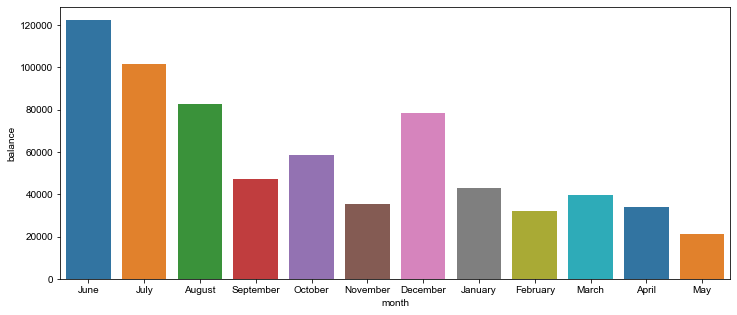

In [18]:
print_barplot(x=monthly_qnt.index, y=monthly_qnt['balance'])

In [19]:
week_per_month = all_qnt.groupby(['month', 'week']).agg({'balance':'sum'})
week_per_month.head()

balance
month  week                 
April  Week 23  16553.450377
       Week 24  17657.013735
August Week 32  15449.887018
       Week 33  26485.520603
       Week 6   19864.140452

#### Quantity of requests on the months with maximum and minimum balance

In [20]:
min_month = monthly_qnt['balance'].min()
min_month = monthly_qnt[monthly_qnt['balance']==min_month].index[0]
max_month = monthly_qnt['balance'].max()
max_month = monthly_qnt[monthly_qnt['balance']==max_month].index[0]

In [21]:
min_weeks = len(week_per_month.loc[min_month,'balance'])
max_weeks = len(week_per_month.loc[max_month,'balance'])

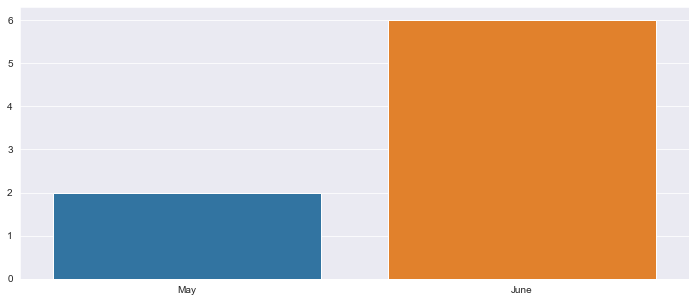

In [22]:
print_barplot(x=[min_month, max_month], y=[min_weeks,max_weeks])

##### Monthly Quantities per Request

In [23]:
def join_all_ratios(all_prices:pd.DataFrame, monthly_price:dict, dict_dfs:dict, period:str, variable: str, report:bool):
    all_ratios = []
    for unity in dict_dfs[period][variable].index:
        ratio = calc_ratio(all_prices=all_prices, dict_dfs=dict_dfs,period=period,variable=variable, unity_of_period=unity)
        all_ratios.append(ratio)
    if report:
        return all_ratios
    else:
        fig, ax = plt.subplots(figsize=(12, 5))
        sns.lineplot(x=monthly_price.index, y=all_ratios)
        sns.set_style('darkgrid')

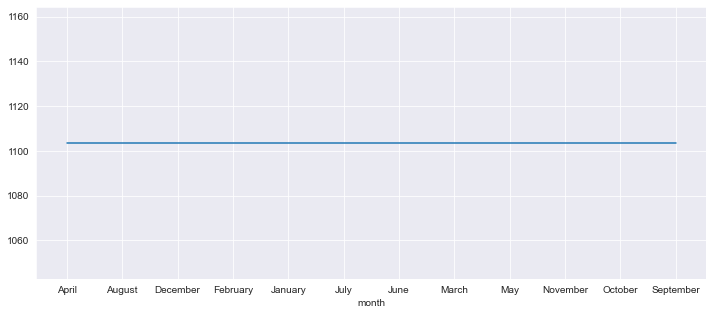

In [24]:
qnt_ratios = join_all_ratios(all_prices=all_prices, monthly_price=monthly_price,dict_dfs=dict_dfs, period='month', variable='qnt', report=True)
join_all_ratios(all_prices=all_prices, monthly_price=monthly_price, dict_dfs=dict_dfs, period='month', variable='qnt', report=False)

In [25]:
price_ratios = join_all_ratios(all_prices=all_prices, monthly_price=monthly_price,dict_dfs=dict_dfs,period='month', variable='price', report=True)

#### Consolidate (Price x Quantity) per Resquest

437541654941.9359


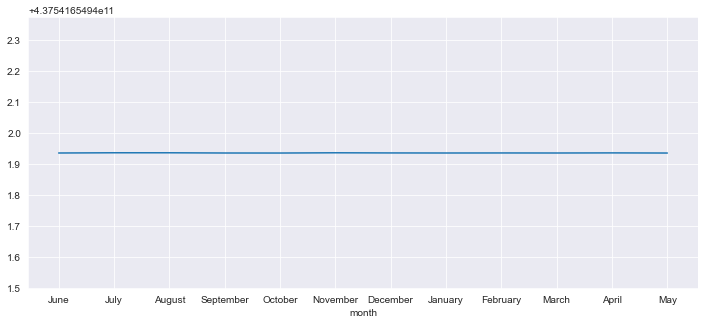

In [26]:
consolidate_per_transaction(dict_dfs=dict_dfs, period='month', qnt=qnt_ratios, price=price_ratios)

#### Week - Quantities

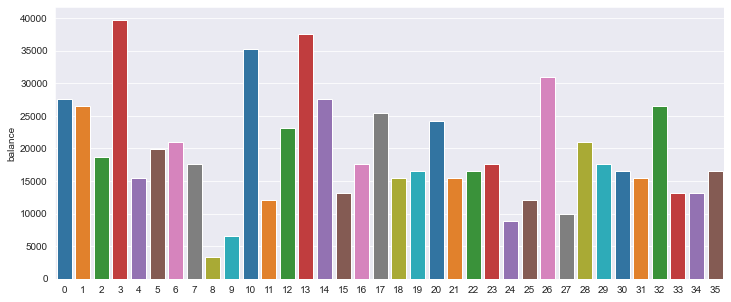

In [27]:
print_barplot(x=[x for x in range(len(weekly_qnt.index))], y=weekly_qnt['balance'])

#### Week - Consolidate

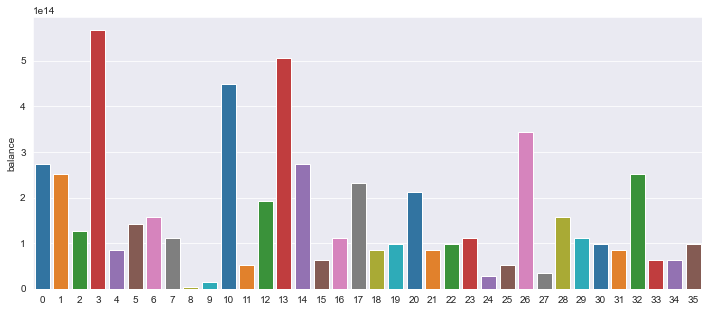

In [28]:
print_barplot(x=[x for x in range(len(df_consolidate_week.index))], y=df_consolidate_week['balance'])

##### Which type sold the best in quantitative terms?

In [29]:
monthly_qnt_to_compare = monthly_qnt.T
monthly_qnt_to_compare=monthly_qnt_to_compare.drop('balance')
prods_type=['unity' if (str(monthly_qnt_to_compare.loc[prod, monthly_qnt_to_compare.columns[0]]).split('.')[1]=='0') else 'kg' \
    for prod in monthly_qnt_to_compare.index]

Index(['kg', 'unity'], dtype='object', name='type')

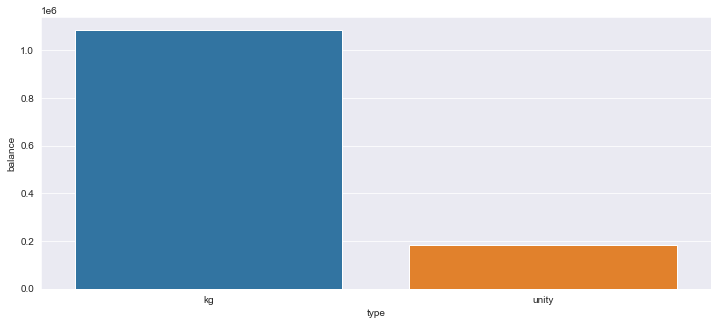

In [30]:
barplot_type(df=monthly_qnt, type_column=prods_type)

#### Adding the values of the unit prices per type

Index(['kg', 'unity'], dtype='object', name='type')

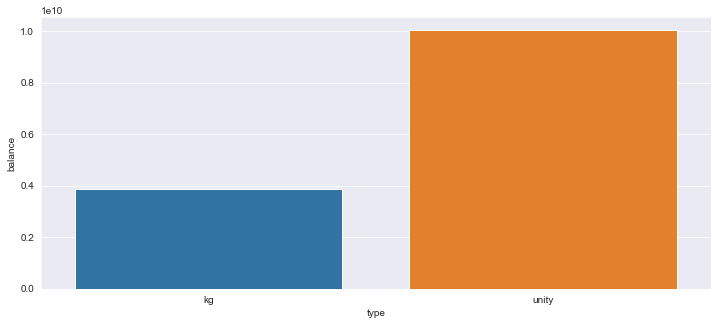

In [31]:
barplot_type(df=monthly_price, type_column=prods_type)

#### Amount per type of product

Index(['kg', 'unity'], dtype='object', name='type')

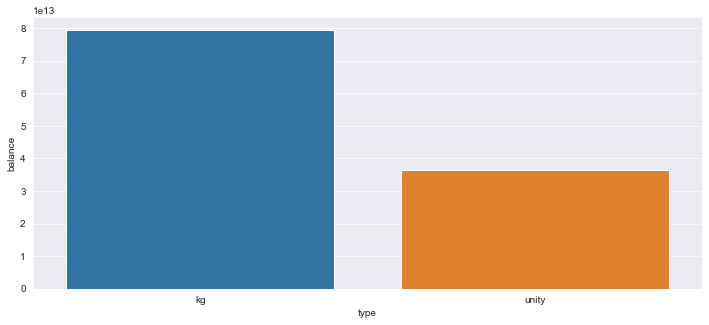

In [32]:
barplot_type(df_consolidate_month, type_column=prods_type)